<a href="https://colab.research.google.com/github/AngelPn/Netflix-Data-Analysis/blob/main/netflix_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Data Mining Notebook
This notebook deals with data from a well-known content platform and production company, Netflix. The following questions will be answered:
1. Which show type is superior, the movies or the series?
2. Has Netflix invested more in movies or series in recent years?
3. Which country has the most content?
4. What kind of content does each country have?
5. Plot graphs showing the actors with the most movies in
each country. Do the same for the series.
6. Plot a graph that gathers the number of
movies depending on the suggested age. Do the same for the series.
7. If a producer wanted to have a high audience, he thinks it would
be better to make his film at a time when it does not exist much
competition. Plot a graph with the content added per month
to help him choose the right time period.
8. Prepare a chart that summarizes the types of content.
9. Plot graphs showing the directors in each country.
10. Plot graphs showing movies analog to number of seasons.
11. What are the highest rated movies?


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Libraries

In [2]:
# For large and multi-dimensional arrays
import numpy as np
# For data manipulation and analysis
import pandas as pd
# Natural language processing library
import nltk
# For random selection 
import random

# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset
Read the data using pandas read_csv method and control missing data.

In [9]:
Location = r'/content/gdrive/MyDrive/ΤΕΔ/data/netflix_titles.csv'
df = pd.read_csv(Location)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Question 1
Which show type is superior, the movies or the series?

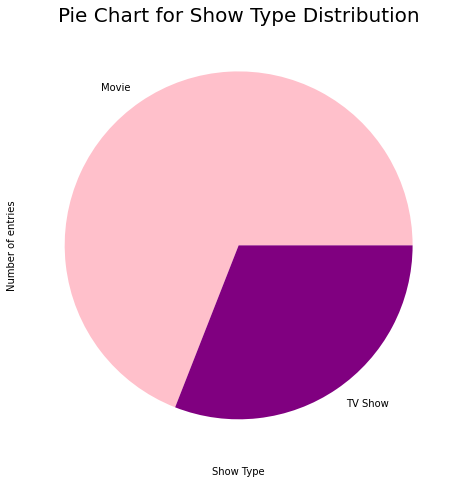

In [13]:
df['type'].value_counts().plot(kind = 'pie', colors=['pink', 'purple'], figsize = (8, 8))
plt.title('Pie Chart for Show Type Distribution', fontsize = 20)
plt.xlabel('Show Type')
plt.ylabel('Number of entries')
plt.show()

the most common type of shows is 'TV Show'

In [14]:
print('Number of entries for "TV Show": {}'.format(max(df['type'].value_counts())))

Number of entries for "TV Show": 5377


# Question 2
Has Netflix invested more in movies or series in recent years?

# Question 3
Which country has the most content?

# Question 4

# Question 5

# Question 6

# Question 7

# Question 8

# Question 9

# Question 10

# Question 11

# Recommendation system